# THÔNG TIN CHUNG VỀ NHÓM VÀ ĐỀ TÀI
## Thành viên nhóm 18
1612441 Phạm Quang Phước Nguyên

1612451 Nguyễn Cao Nhân


## Câu hỏi đặt ra là gì?
Phân loại câu hỏi trong hệ thống hỏi và đáp của bệnh viện Đại học Y dược Thành phố Hồ Chí Minh. Các câu hỏi này được khách, người bệnh, người thân của người bệnh gửi đến bệnh viện thông qua nhiều kênh khác nhau: email, hỏi trực tiếp, fanpage, ... và được tổng hợp ở trang chủ của bệnh viện http://www.bvdaihoc.com.vn/, vào mục Giải đáp & Tư vấn http://gd1.bvdaihoc.com.vn/faqs_all.asp. Trong trang web này người ta phân các câu hỏi thành 30 danh mục khác nhau nhưng nhóm chỉ giải quyết câu hỏi trên 3 nhóm là **Dị ứng - Miễn dịch lâm sàng**, **Phổi** và **Tai mũi họng**.

## Lợi ích của việc trả lời câu hỏi này?
Trước đây thay vì có một người chịu trách nhiệm tiếp nhận câu hỏi sau đó đọc câu hỏi và chuyển tới đúng bác sĩ chuyên khoa để giải đáp (nên biết rằng người này không chỉ có việc xử lý câu hỏi, họ còn đảm nhận các công việc khác tại bệnh viện), có thể có ngày nào đó lượng câu hỏi đến khá nhiều khiến cho việc giải đáp không được kịp thời nhanh chóng. Hi vọng với cách phân loại tự động sẽ giúp tiết kiệm thời gian. (Nhóm có nghĩ tới các trường hợp bị phân loại sai, thì bác sĩ chuyên khoa khi đọc sẽ biết và gửi lại cho đúng chuyên khoa, hi vọng số lượng câu nhầm lẫn này sẽ không nhiều!)
## Nguồn gốc của câu hỏi?
Ngay từ ban đầu nhóm có ý định làm một đề tài gì đó có liên quan tới sức khỏe, y tế nhưng khi tìm dữ liệu thì không có. Rất may sau khi nghe bài trình bày của Viettel về **Hệ thống chăm sóc khách hàng tự động trả lời câu hỏi** tại Zalo AI Summit 2019 thì nhóm đã biết làm gì và quyết định tìm danh sách các bệnh viện có công bố phần hỏi đáp lên trang chủ, thì chỉ thấy có Bệnh viện Đại học Y dược Thành phố Hồ Chí Minh là có và khá nhiều câu hỏi. 

## Tính hợp pháp của dữ liệu?
Sau khi kiểm tra thì trang web không có tạo file robots.txt (kiểm tra ở http://www.bvdaihoc.com.vn/robots.txt và http://gd1.bvdaihoc.com.vn/faqs_all.asp/robots.txt). Sau khi hỏi ý kiến của thầy thì thầy phản hồi có thể chấp nhận được trong quy mô của môn học.

## Mô tả dữ liệu?
Như đã trình bày, nhóm chỉ thu thập và làm việc trên 3 loại **Dị ứng - Miễn dịch lâm sàng**, **Phổi** và **Tai mũi họng**. Sau khi thu thập, nhóm có được 1159 câu hỏi, phân chia theo loại của chúng như sau:
+ **Dị ứng - Miễn dịch lâm sàng**: có 225 câu hỏi
+ **Phổi**: có 210 câu hỏi
+ **Tai, mũi, họng**: có 724 câu hỏi

Dữ liệu được lưu xuống file gồm 2 cột: cột thứ nhất là nội dung câu hỏi, cột thứ hai là id của loại mà chúng thuộc về. Quy ước "Dị ứng - Miễn dịch lâm sàng" là 0, "Phổi" là 1 và "Tai mũi họng" là 2.


## Tính chính xác của dữ liệu?
Nhóm tin tưởng vào sự phân loại của trang web bệnh viện Đại học Y dược Thành phố Hồ Chí Minh!
## Một số vấn đề khác của dữ liệu?
Như đã biết, dữ liệu dạng văn bản luôn gặp các vấn đề như: lỗi chính tả, viết tắt, viết ký hiệu... Việc này làm cho tập từ điển chứa rất nhiều từ không có giá trị.

# GIAI ĐOẠN 1: LẤY DỮ LIỆU    

In [1]:
#Thêm các thư viện cần thiết
from requests_html import HTMLSession
import requests
import time # Dùng để sleep chương trình
import datetime as dt # Dùng để xử lý dữ liệu thời gian
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #Chia tập dữ liệu

from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Link của 3 trang đầu tiên của 3 nhóm chuyên khoa, các câu hỏi của từng nhóm chuyên khoa được lưu trong nhiều trang
page_list = ["http://gd1.bvdaihoc.com.vn/faqs_all.asp?Category=48",
            "http://gd1.bvdaihoc.com.vn/faqs_all.asp?Category=24",
            "http://gd1.bvdaihoc.com.vn/faqs_all.asp?Category=30"]

In [3]:
def getData(page_list):
    web_data = []
    session = HTMLSession()
    for p_type in range(len(page_list)):
        page_url = page_list[p_type]   
        r = session.get(page_url).html
        
        # Tổng số trang của chuyên khoa
        num_pages = len(r.find('#AutoNumber13')[0].find('td')[1].find('option'))
        
        # Lấy câu hỏi trong từng trang
        for page_index in range(num_pages):
            url = page_url + "&page=" + str(page_index + 1)
            r = session.get(url).html
            
            questions = r.find("#AutoNumber6")[1].find('a')
            for question in questions:
                web_data.append({'Question': question.text, 'Type': p_type})
                
        #print(str(round((p_type + 1) * 100 / len(page_list), 2)) + "%")
    return web_data            

In [4]:
# Lấy dữ liệu từ web rồi ghi ra file csv

data = getData(page_list)
pd.DataFrame(data).to_csv("crawQuestion.csv",index = False, header=True)

In [5]:
# read csv

df = pd.read_csv("crawQuestion.csv")
print(df.count()) #1159
df.head()

Question    1159
Type        1159
dtype: int64


,Question,Type
0,Chào BS. Năm nay tôi 69 tuổi. Thỉnh thoảng khi...,0
1,"Chào BS, Cho mình hỏi trên bệnh viện mình có x...",0
2,"BS cho em hỏi, em năm nay 33t, đã có gia đình,...",0
3,Em uống thuốc nhưng cơ thể không chịu được thu...,0
4,Chào bác sĩ. Em là nữ (93) em bị dị ứng nổi mề...,0


# GIAI ĐOẠN 2: TIỀN XỬ LÝ DỮ LIỆU

In [6]:
# Tạo các tập train, validation và test

X_df = df["Question"]
y_df = df["Type"]

X_train_val, X_test, y_train_val, y_test = train_test_split(X_df, y_df, test_size=0.3, stratify=y_df, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=0)

print(len(X_train), len( X_val), len(X_test))

648 163 348


In [7]:
#Xem các số lượng các loại trong từng tập

print(y_train.value_counts()) #125, 118, 405
print(y_val.value_counts()) #32, 29, 102
print(y_test.value_counts())#68, 63, 217

2    405
0    125
1    118
Name: Type, dtype: int64
2    102
0     32
1     29
Name: Type, dtype: int64
2    217
0     68
1     63
Name: Type, dtype: int64


In [8]:
class bagOfWord():
    def fit(self, X_data, y=None):
        # Tạo danh sách stop-word tiếng việt là từ đơn
        stop_word_list = pd.read_csv('vietnamese-stopwords.txt')['word']
        stop_words = {}
        for word in stop_word_list.iteritems():
            stop_words[word[1].lower()] = 1
        #print(stop_words)
        
        # Đếm các từ có trong tập X_data
        word_counts = {}
        for question in X_train.iteritems():
            for word in re.split('[ ,./:()\-!?]', question[1]):  
                # Bỏ các từ ít hơn 1 ký tự và có chứa số
                if len(word) <= 1 or len(re.findall(r'[d]+', word)) > 0: continue
                
                # Chuẩn hóa từ và lọc stop-word
                w = word.lower()               
                if stop_words.get(w, None) != None: continue
                
                # Cập nhật tần số
                freq = word_counts.get(w, 0)
                word_counts[w] = freq + 1
                
        #word_counts = sorted(word_counts.items(), key=lambda kv: kv[1], reverse=True)       
        
        # Tạo danh sách các từ phổ biến
        self.dictionary = {}
        index = 0
        for (word, freq) in word_counts.items():
            if (freq > 15): # lọc các từ có tần số thấp
                self.dictionary[word] = index
                index += 1
        #print(self.dictionary)
        
        return self
    
    def transform(self, X_data, y=None):
        matrix = np.zeros((len(X_data), len(self.dictionary)), dtype=int) #số dòng là số mẫu dữ liệu, số cột là số từ trong dictionary
        
        row_index = 0
        for question in X_data.iteritems():
            for word in re.split('[ ,./:()\-!?]', question[1]):
                # Bỏ qua các từ ít hơn 1 ký tự
                if (len(word) <= 1): continue
                    
                # Chuẩn hóa từ
                w = word.lower()
                               
                if self.dictionary.get(w, None) != None:
                    matrix[row_index, self.dictionary[w]] = 1
            row_index += 1
        
        return matrix

In [9]:
#Test thử bagOfWord

bag = bagOfWord()
bag.fit(X_train)

data1 = bag.transform(X_train)
data2 = bag.transform(X_test)

print(data1.shape) # (số dòng, số cột) = (số mẫu dữ liệu, số chiều của veto đặc trưng)
print(data2.shape) #(348,450)

(648, 450)
(348, 450)


# GIAI ĐOẠN 3: TẠO PINELINE, LỰA CHỌN MÔ HÌNH

In [10]:
# Tạo pipeline

pca = PCA(n_components = 100)
clf = MLPClassifier(hidden_layer_sizes=(20), alpha=0.1, activation='tanh', solver='lbfgs', random_state=0, max_iter=500)
full_pipeline = Pipeline([("BagOfWord",bagOfWord()), ("PCA", pca) ,("NN", clf)])

In [11]:
train_errs = []
val_errs = []
alphas = [0.1, 1, 10, 100]
components = [50, 100, 150, 200]

best_val_err = float('inf')

best_alpha = None
best_component = None

In [12]:
# Lựa chọn các siêu tham số

for alpha in alphas:
    for component in components:
        full_pipeline.set_params(PCA__n_components=component, NN__alpha=alpha)
        
        full_pipeline.fit(X_train, y_train)

        # Tính độ lỗi trên tập train
        train = full_pipeline.predict(X_train)
        train_err = round(np.mean(train != y_train) * 100, 2)
        train_errs.append(train_err)
        
        # Tính độ lỗi trên tập validation
        val = full_pipeline.predict(X_val)
        val_err = round(np.mean(val != y_val) * 100, 2)
        val_errs.append(val_err)
        
        #Tìm độ lỗi thấp nhất trên tập validation
        if val_err < best_val_err:
            best_val_err = val_err
            best_alpha = alpha 
            best_component = component
'Finish!'

'Finish!'

In [13]:
print(best_val_err)
print(best_alpha)
print(best_component)

14.72
10
200


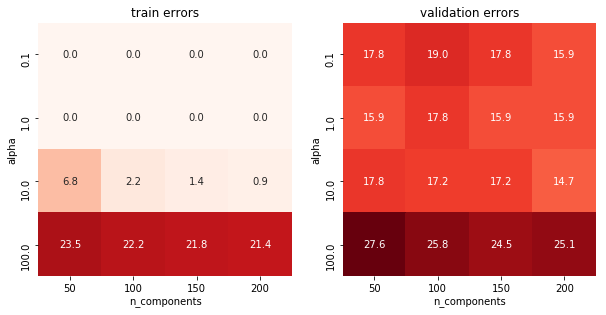

In [14]:
# Trực quan hóa kết quả (code lấy từ file BT03 của Thầy)

train_errs_df = pd.DataFrame(data=np.array(train_errs).reshape(len(alphas), -1),
                             index=alphas, columns=components)
val_errs_df = pd.DataFrame(data=np.array(val_errs).reshape(len(alphas), -1), 
                           index=alphas, columns=components)

min_err = min(min(train_errs), min(val_errs))
max_err = max(max(train_errs), max(val_errs))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')

plt.title('train errors'); plt.xlabel('n_components'); plt.ylabel('alpha')
plt.subplot(1, 2, 2)
sns.heatmap(val_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')

plt.title('validation errors'); plt.xlabel('n_components'); plt.ylabel('alpha');

# GIAI ĐOẠN 4: TRAIN VÀ TEST MÔ HÌNH ĐÃ CHỌN

In [15]:
# Huấn luyện lần cuối trên tập train+val

full_pipeline.set_params(PCA__n_components=best_component, NN__alpha=best_alpha)
full_pipeline.fit(X_train_val,y_train_val)

Pipeline(memory=None,
     steps=[('BagOfWord', <__main__.bagOfWord object at 0x0000022F4DD3C4E0>), ('PCA', PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('NN', MLPClassifier(activation='tanh', alpha=10, batch_size='auto', beta_1=0.9,
       beta_2=0.9...True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])

In [16]:
# Đánh giá trên tập test

test = full_pipeline.predict(X_test)
test_err = np.mean(test != y_test) * 100

print("Error: ", test_err)
print("Acuracy: ", 100 - test_err)

Error:  10.057471264367816
Acuracy:  89.94252873563218
